In [4]:
import pandas as pd

df = pd.read_csv("./datasets/Amazon_top_selling_book.csv")
print(df)
# print("\ndescribe function\n")
print(df.describe())
# print("\nhead function\n")
print(df.head())
# print("\ntail function\n")
print(df.tail())
print(df.info())
print(df.isnull())

                                                  Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

In [22]:
# calculate the sum of missing entries in the dataset
# fill the missing values with the most frequent value 
missing_value = df.isnull().sum(axis=0)
print(missing_value)

for column in df.columns:
    most_frequent_value = df[column].mode()[0]
    print(most_frequent_value)
    df[column].fillna(most_frequent_value, inplace=True)
print(df)

print(df.isnull().sum(axis=0))

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64
Publication Manual of the American Psychological Association, 6th Edition
Jeff Kinney
4.8
8580
8
2009
Non Fiction
                                                  Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Pric

In [26]:
# drop the rows with missing values 
df.dropna(inplace=True)
print(df.isnull().sum(axis=0))

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


In [29]:
# convert the columns with data type string to data type categorical
string_columns = df.select_dtypes(include=['string']).columns
for column in string_columns:
    df[column] = df[column].astype('category')
print(df.dtypes)

Name           category
Author         category
User Rating     float64
Reviews           int64
Price             int64
Year              int64
Genre          category
dtype: object


                                                  Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

/home/qiqingh/.pyenv/versions/3.7.8/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


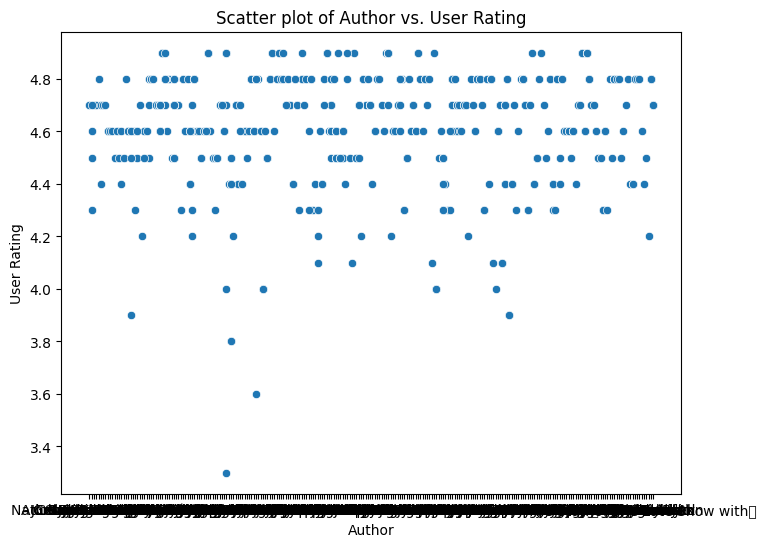

/home/qiqingh/.pyenv/versions/3.7.8/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


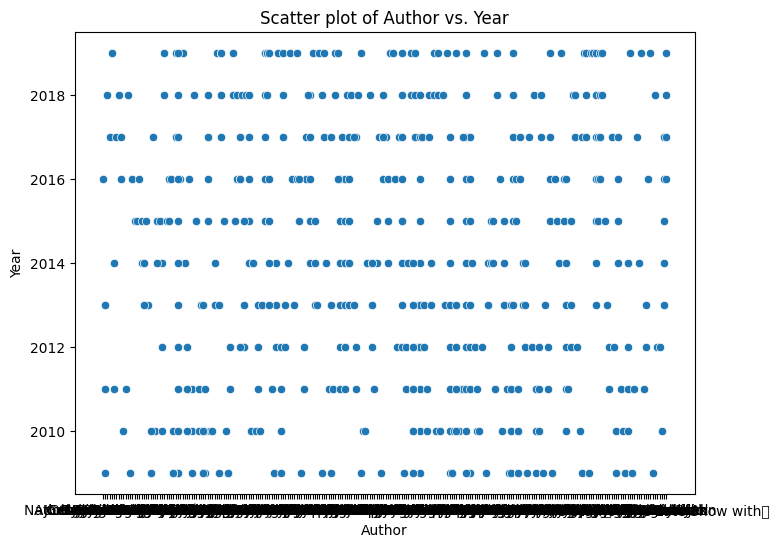

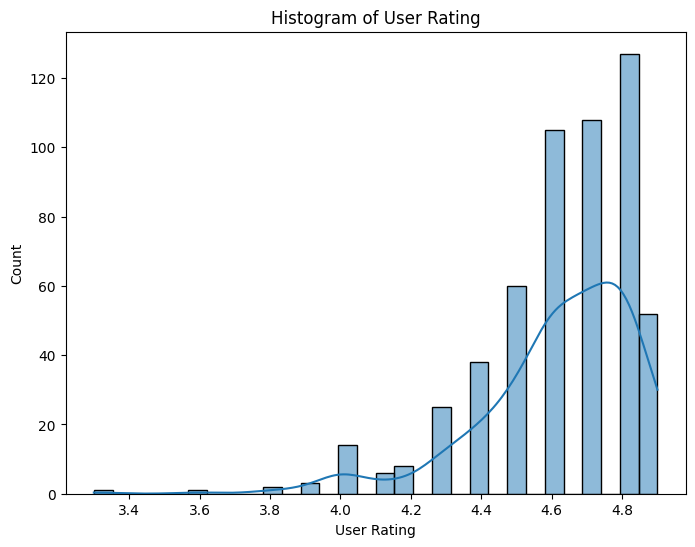

/home/qiqingh/.pyenv/versions/3.7.8/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


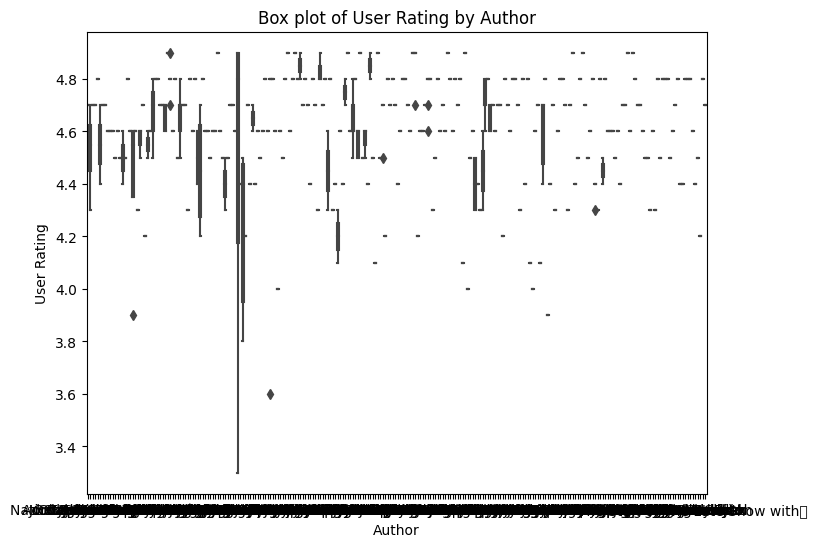

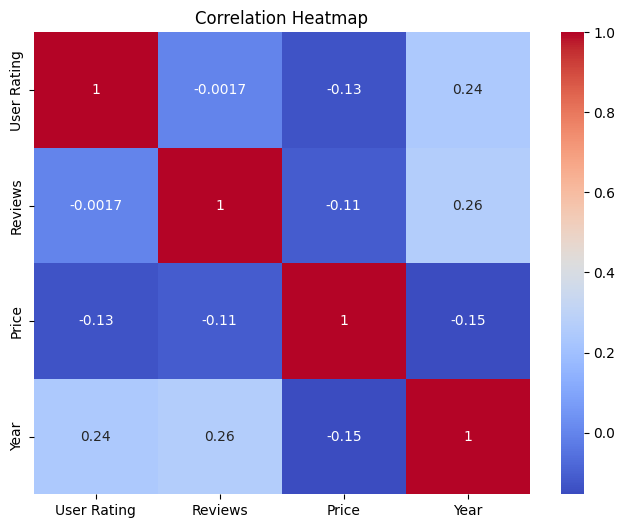

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
print(df)

# Scatter plot 
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Author"], y=df["User Rating"])
plt.title("Scatter plot of Author vs. User Rating")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Author"], y=df["Year"])
plt.title("Scatter plot of Author vs. Year")
plt.show()

# Histograms
plt.figure(figsize=(8, 6))
sns.histplot(df["User Rating"], kde=True, bins=30)
plt.title(f"Histogram of User Rating")
plt.show()

# Box plots
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x=df["Author"], y=df["User Rating"])
plt.title(f"Box plot of User Rating by Author")
plt.show()

# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
